## DFO Nutrient Comparison
### spring2015_KhT: Temperature Dep Experiment

In [1]:
import sqlalchemy
from sqlalchemy import (create_engine, Column, String, Integer, Float, MetaData, 
                        Table, type_coerce, ForeignKey, case)
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
import glob

%matplotlib inline

In [2]:
t0=dt.datetime(2015,3,8)
datestr=t0.strftime('%Y%m%d')+'-'+(t0+dt.timedelta(days=9)).strftime('%Y%m%d')
PATH= '/data/eolson/MEOPAR/SS36runs/OrcinusRuns/spring2015_SMELTBKhTOrc/'
f0=nc.Dataset(glob.glob(PATH + 'SalishSea*1h*ptrc_T*' + datestr +'.nc')[0])
PATH1= '/data/eolson/MEOPAR/SS36runs/CedarRuns/spring2015_KhT/'
f1=nc.Dataset(glob.glob(PATH1 + 'SalishSea*1h*ptrc_T*' + datestr +'.nc')[0])
mesh=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')

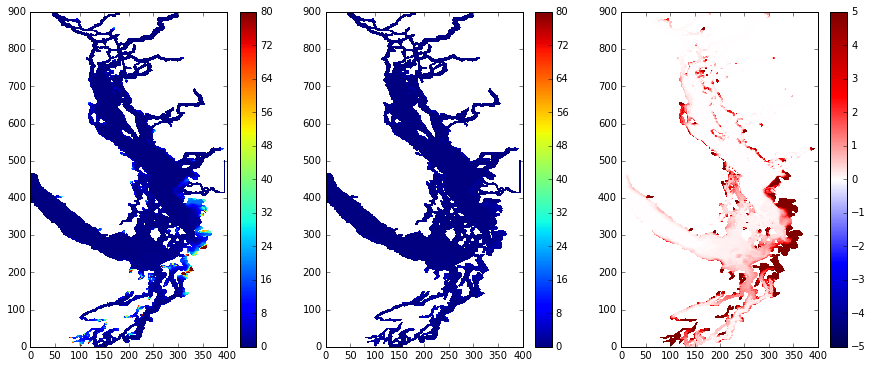

In [3]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
tmask=mesh.variables['tmask'][0,:,:,:]
mask1=tmask[:-1,:,:]-tmask[1:,:,:]
var=np.sum(mask1*f0.variables['biogenic_silicon'][12,:-1,:,:],0)
var1=np.sum(mask1*f1.variables['biogenic_silicon'][12,:-1,:,:],0)
mesh0=ax[0].pcolormesh(np.ma.masked_where(mesh.variables['tmask'][0,0,:,:]==0,var),vmin=0,vmax=80)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.ma.masked_where(mesh.variables['tmask'][0,0,:,:]==0,var1),vmin=0,vmax=80)
fig.colorbar(mesh1,ax=ax[1])
mesh2=ax[2].pcolormesh(np.ma.masked_where(mesh.variables['tmask'][0,0,:,:]==0,var-var1),cmap=plt.get_cmap('seismic'),
                      vmin=-5,vmax=5)
fig.colorbar(mesh2,ax=ax[2])

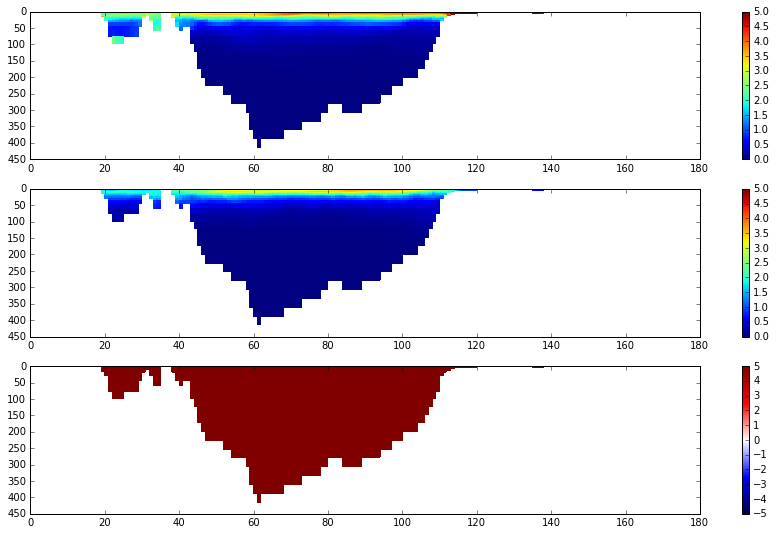

In [14]:
fig,ax=plt.subplots(3,1,figsize=(15,9))
mesh0=ax[0].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                                                    f0.variables['biogenic_silicon'][0,:,450,200:370]),vmin=-0,vmax=5)
ax[0].set_ylim(450,0)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                                                    f1.variables['biogenic_silicon'][0,:,450,200:370]),vmin=-0,vmax=5)
ax[1].set_ylim(450,0)
fig.colorbar(mesh1,ax=ax[1])
mesh2=ax[2].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                    f0.variables['silicon'][0,:,450,200:370]-f1.variables['biogenic_silicon'][0,:,450,200:370]),cmap=plt.get_cmap('seismic'),
                      vmin=-5,vmax=5)
ax[2].set_ylim(450,0)
fig.colorbar(mesh2,ax=ax[2])

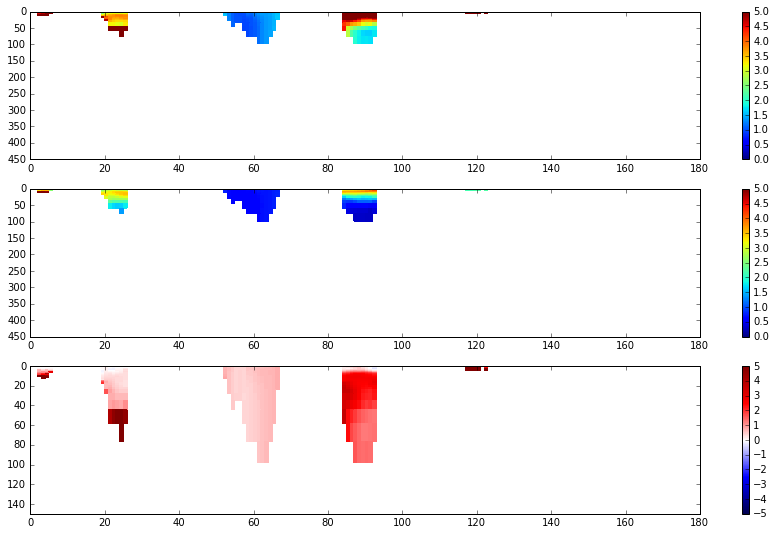

In [15]:
fig,ax=plt.subplots(3,1,figsize=(15,9))
yind=200
mesh0=ax[0].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,yind,200:370]==0,
                                                                    f0.variables['biogenic_silicon'][0,:,yind,200:370]),vmin=0,vmax=5)
ax[0].set_ylim(450,0)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,yind,200:370]==0,
                                                                    f1.variables['biogenic_silicon'][0,:,yind,200:370]),vmin=0,vmax=5)
ax[1].set_ylim(450,0)
fig.colorbar(mesh1,ax=ax[1])
mesh2=ax[2].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,yind,200:370]==0,
                                    f0.variables['biogenic_silicon'][0,:,yind,200:370]-f1.variables['biogenic_silicon'][0,:,yind,200:370]),cmap=plt.get_cmap('seismic'),
                      vmin=-5,vmax=5)
ax[2].set_ylim(150,0)
fig.colorbar(mesh2,ax=ax[2])

In [ ]:
24*3600/2160

In [ ]:
.05/40*24*3600

In [ ]:
100/(24*3600)

In [16]:
t1=dt.datetime(2015,2,5)
datestr=t0.strftime('%Y%m%d')+'-'+(t0+dt.timedelta(days=9)).strftime('%Y%m%d')
PATH= '/data/eolson/MEOPAR/SS36runs/OrcinusRuns/spring2015_SMELTBKhTOrc/'
f01=nc.Dataset(glob.glob(PATH + 'SalishSea*1h*ptrc_T*' + datestr +'.nc')[0])
PATH1= '/data/eolson/MEOPAR/SS36runs/CedarRuns/spring2015_KhT/'
f11=nc.Dataset(glob.glob(PATH1 + 'SalishSea*1h*ptrc_T*' + datestr +'.nc')[0])

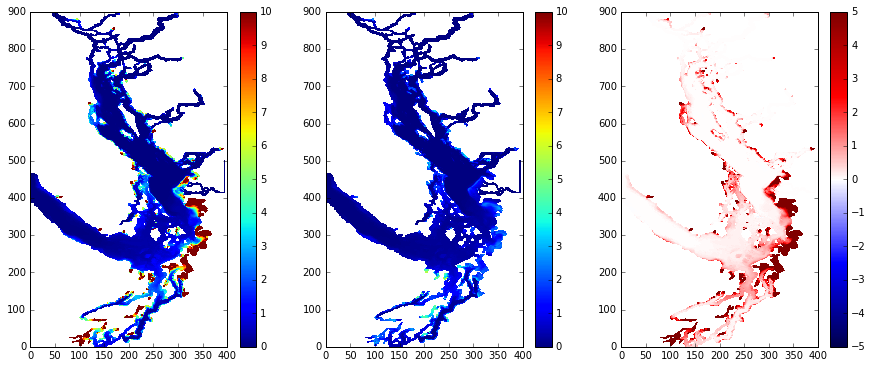

In [18]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
tmask=mesh.variables['tmask'][0,:,:,:]
mask1=tmask[0:-1,:,:]-tmask[1:,:,:]
var=np.sum(mask1*f01.variables['biogenic_silicon'][0,:-1,:,:],0)
var1=np.sum(mask1*f11.variables['biogenic_silicon'][0,:-1,:,:],0)
mesh0=ax[0].pcolormesh(np.ma.masked_where(mesh.variables['tmask'][0,0,:,:]==0,var),vmin=0,vmax=10)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.ma.masked_where(mesh.variables['tmask'][0,0,:,:]==0,var1),vmin=0,vmax=10)
fig.colorbar(mesh1,ax=ax[1])
mesh2=ax[2].pcolormesh(np.ma.masked_where(mesh.variables['tmask'][0,0,:,:]==0,var-var1),cmap=plt.get_cmap('seismic'),
                      vmin=-5,vmax=5)
fig.colorbar(mesh2,ax=ax[2])

/home/eolson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:1006: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


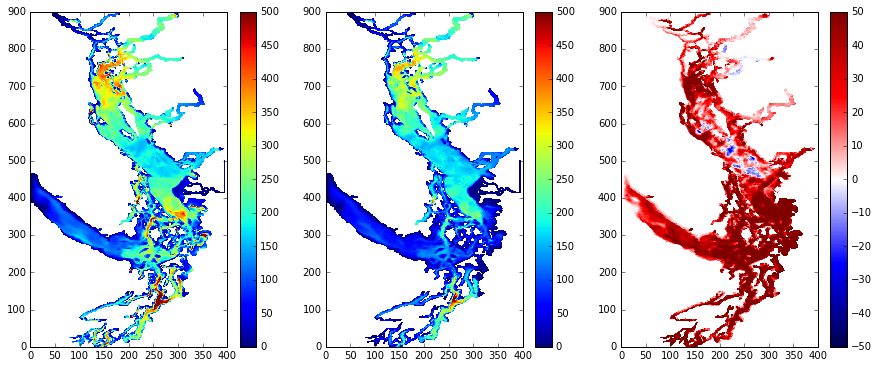

In [20]:
f11T=nc.Dataset(glob.glob(PATH1 + 'SalishSea*1h*grid_T*' + datestr +'.nc')[0])
fig,ax=plt.subplots(1,3,figsize=(15,6))
tmask=mesh.variables['tmask'][0,:,:,:]
var=np.sum(f01.variables['biogenic_silicon'][-1,:,:,:]*f01.variables['e3t'][-1,:,:,:],0)
var1=np.sum(f11.variables['biogenic_silicon'][-1,:,:,:]*f11T.variables['e3t'][-1,:,:,:],0)
mesh0=ax[0].pcolormesh(np.ma.masked_where(mesh.variables['tmask'][0,0,:,:]==0,var),vmin=0,vmax=500)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.ma.masked_where(mesh.variables['tmask'][0,0,:,:]==0,var1),vmin=0,vmax=500)
fig.colorbar(mesh1,ax=ax[1])
mesh2=ax[2].pcolormesh(np.ma.masked_where(mesh.variables['tmask'][0,0,:,:]==0,var-var1),cmap=plt.get_cmap('seismic'),
                      vmin=-50,vmax=50)
fig.colorbar(mesh2,ax=ax[2])

In [21]:
tf=nc.Dataset('/data/eolson/MEOPAR/SS36runs/OrcinusRuns/spring2015_SMELTBFastSink/SalishSea_1h_20150206_20150506_ptrc_T_20150206-20150215.nc')

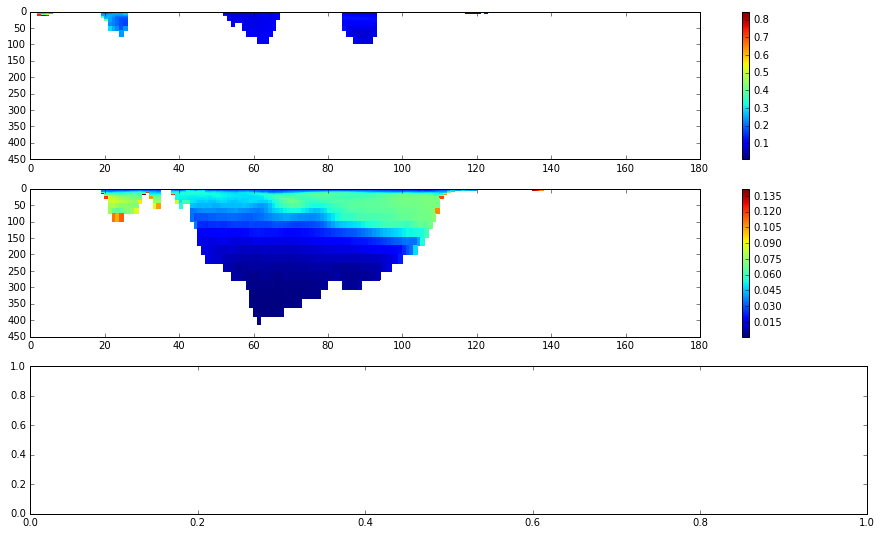

In [22]:
fig,ax=plt.subplots(3,1,figsize=(15,9))
yind=200
mesh0=ax[0].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,yind,200:370]==0,
                                                                    tf.variables['biogenic_silicon'][0,:,yind,200:370]))
ax[0].set_ylim(450,0)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                                                    tf.variables['biogenic_silicon'][0,:,450,200:370]))
ax[1].set_ylim(450,0)
fig.colorbar(mesh1,ax=ax[1])

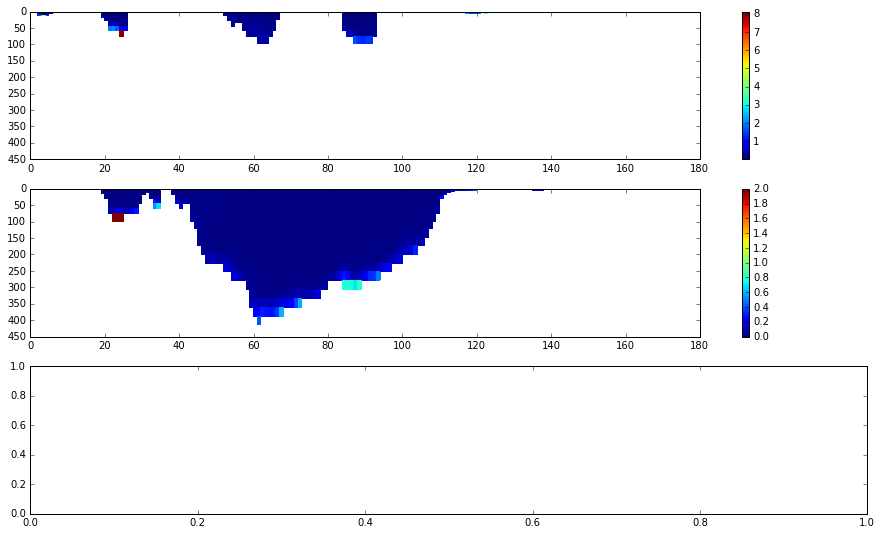

In [25]:
fig,ax=plt.subplots(3,1,figsize=(15,9))
yind=200
mesh0=ax[0].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,yind,200:370]==0,
                                                                    tf.variables['biogenic_silicon'][-1,:,yind,200:370]))
ax[0].set_ylim(450,0)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                                                    tf.variables['biogenic_silicon'][-1,:,450,200:370]),vmin=0,vmax=2)
ax[1].set_ylim(450,0)
fig.colorbar(mesh1,ax=ax[1])

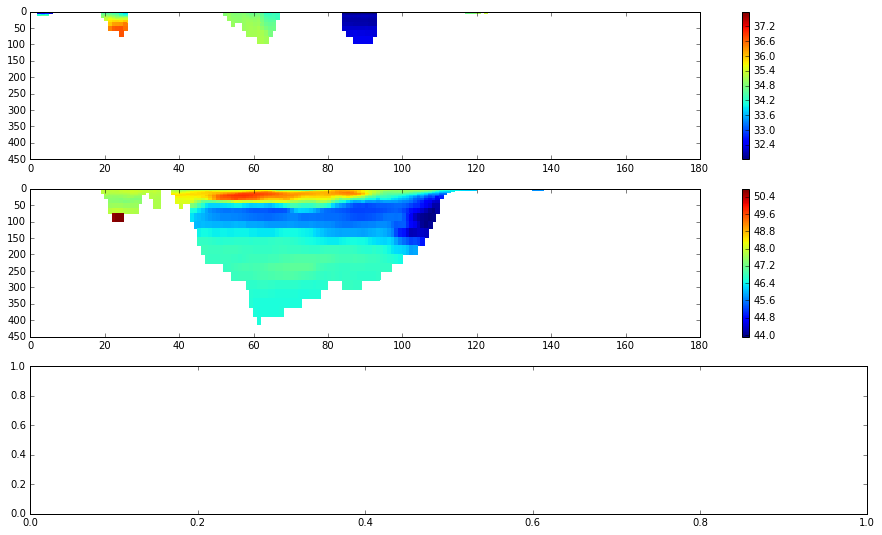

In [29]:
fig,ax=plt.subplots(3,1,figsize=(15,9))
yind=200
mesh0=ax[0].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,yind,200:370]==0,
                                                                    tf.variables['silicon'][-1,:,yind,200:370]))
ax[0].set_ylim(450,0)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                                                    tf.variables['silicon'][-1,:,450,200:370]))
ax[1].set_ylim(450,0)
fig.colorbar(mesh1,ax=ax[1])

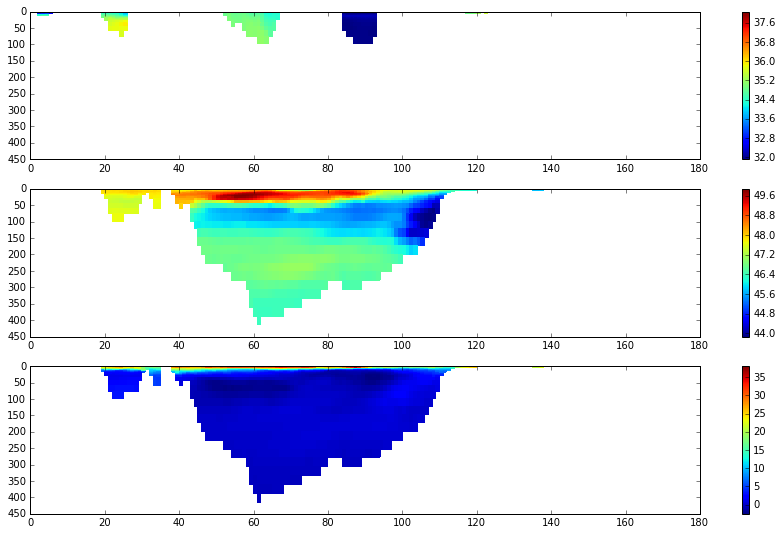

In [37]:
tf2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/OrcinusRuns/spring2015_SMELTB0Orc/SalishSea_1h_20150206_20150506_ptrc_T_20150206-20150215.nc')
fig,ax=plt.subplots(3,1,figsize=(15,9))
yind=200
mesh0=ax[0].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,yind,200:370]==0,
                                                                    tf2.variables['silicon'][-1,:,yind,200:370]))
ax[0].set_ylim(450,0)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                                                    tf2.variables['silicon'][-1,:,450,200:370]))
ax[1].set_ylim(450,0)
fig.colorbar(mesh1,ax=ax[1])

mesh2=ax[2].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                                tf2.variables['silicon'][-1,:,450,200:370]-f11.variables['silicon'][-1,:,450,200:370]))
ax[2].set_ylim(450,0)
fig.colorbar(mesh2,ax=ax[2])

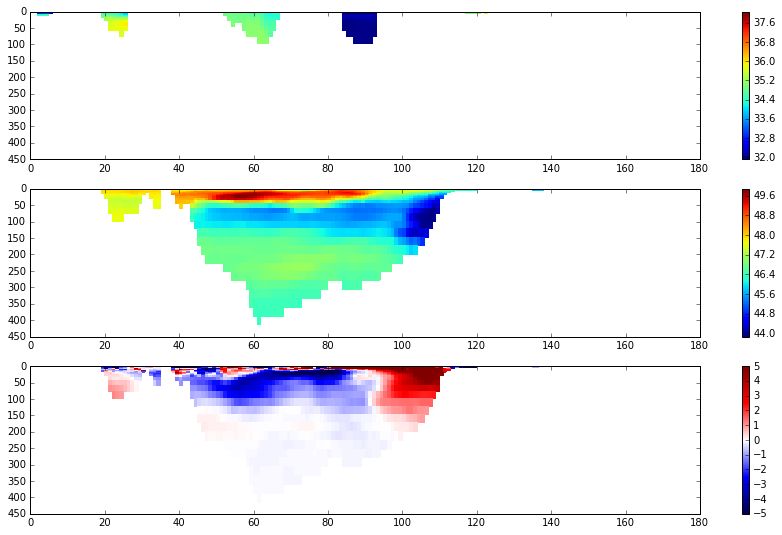

In [39]:
tf3=nc.Dataset('/data/eolson/MEOPAR/SS36runs/OrcinusRuns/spring2015_SMELTB0Orc/SalishSea_1h_20150206_20150506_ptrc_T_20150308-20150317.nc')
fig,ax=plt.subplots(3,1,figsize=(15,9))
yind=200
mesh0=ax[0].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,yind,200:370]==0,
                                                                    tf2.variables['silicon'][-1,:,yind,200:370]))
ax[0].set_ylim(450,0)
fig.colorbar(mesh0,ax=ax[0])
mesh1=ax[1].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                                                    tf2.variables['silicon'][-1,:,450,200:370]))
ax[1].set_ylim(450,0)
fig.colorbar(mesh1,ax=ax[1])

mesh2=ax[2].pcolormesh(np.arange(0,370-200),mesh.variables['gdept_1d'][0,:],np.ma.masked_where(tmask[:,450,200:370]==0,
                                                tf3.variables['silicon'][-1,:,450,200:370]-f1.variables['silicon'][-1,:,450,200:370]),
                      vmin=-5,vmax=5,cmap=plt.get_cmap('seismic'))
ax[2].set_ylim(450,0)
fig.colorbar(mesh2,ax=ax[2])